# Proyecto 2

**Tema:** Predicción de enfermedades Cardíacas


|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Medidas de Desempeño - Comparación de Modelos

## Librerías Requeridas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Resumen

In [5]:
original_model = {
    'accuracy': 0.76,
    'precision': 0.74,
    'recall': 0.75,
    'f1_score': 0.74,
    'specificity': 0.77,
}

restrictions_model = {
    'accuracy': 0.75,
    'precision': 0.76,
    'recall': 0.67,
    'f1_score': 0.7,
    'specificity': 0.8,
}

k2score_model = {
    'accuracy': 0.79,
    'precision': 0.75,
    'recall': 0.8,
    'f1_score': 0.77,
    'specificity': 0.78,
}

bicscore_model = {
    'accuracy': 0.84,
    'precision': 0.86,
    'recall': 0.79,
    'f1_score': 0.82,
    'specificity': 0.89,
}

othergroup_model = {
    'accuracy': 0.82,
    'precision': 0.82,
    'recall': 0.79,
    'f1_score': 0.8,
    'specificity': 0.85,
}

metrics = [original_model, restrictions_model, k2score_model, bicscore_model, othergroup_model]

models = ['original', 'restrictions', 'k2score', 'bicscore', 'othergroup']

df_comparison = pd.DataFrame(metrics, index=[models])

In [6]:
df_comparison

,accuracy,precision,recall,f1_score,specificity
original,0.76,0.74,0.75,0.74,0.77
restrictions,0.75,0.76,0.67,0.70,0.80
k2score,0.79,0.75,0.80,0.77,0.78
bicscore,0.84,0.86,0.79,0.82,0.89
othergroup,0.82,0.82,0.79,0.80,0.85


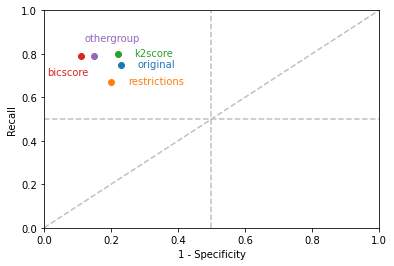

In [60]:
# Create color map based on row index
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(df_comparison))]

# Create plot
fig, ax =plt.subplots()

# Ax limits
plt.xlim(0, 1)
plt.ylim(0, 1)

# Lines for guide
ax.axvline(x=0.5, color='silver', linestyle='--')
ax.axhline(y=0.5, color='silver', linestyle='--')
x = [0, 1]
y = [0, 1]
ax.plot(x, y, color='silver', linestyle='--')


# Graph points
cont = 0
for i, row in df_comparison.iterrows():
    ax.scatter(1-row['specificity'], row['recall'], color=colors[cont], label=i[0])
    cont += 1

# Add text for each point
cont = 0
for i, txt in enumerate(df_comparison.index):
    if txt[0] == 'bicscore':
        ax.annotate(txt[0], (1-df_comparison['specificity'][i]-0.1, df_comparison['recall'][i]-0.09), color=colors[cont])
    elif txt[0] == 'othergroup':
        ax.annotate(txt[0], (1-df_comparison['specificity'][i]-0.03, df_comparison['recall'][i]+0.07), color=colors[cont])
    else:
        ax.annotate(txt[0], (1-df_comparison['specificity'][i]+0.05, df_comparison['recall'][i]-0.01), color=colors[cont])
    cont += 1

plt.xlabel("1 - Specificity")
plt.ylabel("Recall")
plt.show()

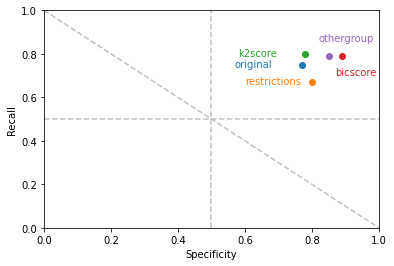

In [73]:
# Create color map based on row index
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(df_comparison))]

# Create plot
fig, ax =plt.subplots()

# Ax limits
plt.xlim(0, 1)
plt.ylim(0, 1)

# Lines for guide
ax.axvline(x=0.5, color='silver', linestyle='--')
ax.axhline(y=0.5, color='silver', linestyle='--')
x = [0, 1]
y = [1, 0]
ax.plot(x, y, color='silver', linestyle='--')


# Graph points
cont = 0
for i, row in df_comparison.iterrows():
    ax.scatter(row['specificity'], row['recall'], color=colors[cont], label=i[0])
    cont += 1

# Add text for each point
cont = 0
for i, txt in enumerate(df_comparison.index):
    if txt[0] == 'bicscore':
        ax.annotate(txt[0], (df_comparison['specificity'][i]-0.02, df_comparison['recall'][i]-0.09), color=colors[cont])
    elif txt[0] == 'othergroup':
        ax.annotate(txt[0], (df_comparison['specificity'][i]-0.03, df_comparison['recall'][i]+0.07), color=colors[cont])
    else:
        ax.annotate(txt[0], (df_comparison['specificity'][i]-0.2, df_comparison['recall'][i]-0.01), color=colors[cont])
    cont += 1

plt.xlabel("Specificity")
plt.ylabel("Recall")
plt.show()